In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import numpy as np
import os
import random
import pathlib
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
import math

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip



--2023-05-10 16:52:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.8MB/s    in 24s     

2023-05-10 16:52:40 (20.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
zip_ref = zipfile.ZipFile("/content/10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 10 directories and 0 images in 10_fo

In [5]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [6]:
def view_random_image(target_dir, target_class):
  target_folder  = target_dir + "/" + target_class
  
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

Image shape: (341, 512, 3)


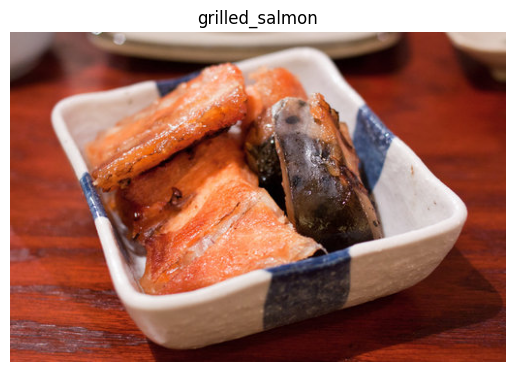

In [7]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
img = view_random_image(train_dir, random.choice(class_names))


In [8]:
IMG_SIZE = (244, 244)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=True    
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir, 
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

test_data = train_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="categorical"
)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [9]:
model = Sequential(
    [
      Conv2D(
          filters=32,
          kernel_size=3,
          strides=1,
          padding="valid",
          activation="relu",
          input_shape=(244, 244, 3)
      ),
      Conv2D(32, 3, activation="relu"),
      MaxPool2D(pool_size=3, padding="valid"),

      Conv2D(32, 3, activation="relu"),
      Conv2D(32, 3, activation="relu"),
      MaxPool2D(pool_size=3, padding="valid"),

      Conv2D(32, 3, activation="relu"),
      Conv2D(32, 3, activation="relu"),
      MaxPool2D(pool_size=3, padding="valid"),

      Conv2D(32, 3, activation="relu"),
      Conv2D(32, 3, activation="relu"),
      MaxPool2D(pool_size=3, padding="valid"),

      Flatten(),
      Dense(10, activation="softmax")
    ]
)



In [10]:
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
model.fit(
    train_data,
    epochs=20,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/20
148/235 [=================>............] - ETA: 48s - loss: 0.3492 - accuracy: 0.0999

In [ ]:
def preprocess_image(image, img_shape=244):
  """Reads an image from filename, turns it into a reshaped tensor"""
  img = tf.io.read_file(image)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # rescale the image getting all the values between 0 and 1
  img = img/255.
  return tf.expand_dims(img, axis=0)

In [ ]:
def predict_food_type(img, model):
  img = preprocess_image(img, img_shape=244)
  predictions = model.predict(img)
  prediction = np.argmax(predictions, axis=1)
  print(prediction)
  food_type = class_names[int(prediction)]
  print(f"This food is {food_type}")

In [ ]:
predict_food_type("pizza-01.jpg", model)

1/1 [==============================] - 0s 34ms/step
[6]
This food is pizza


In [ ]:
!wget https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F19%2F2014%2F07%2F10%2Fpepperoni-pizza-ck-x.jpg&q=60





--2022-10-14 17:23:34--  https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F19%2F2014%2F07%2F10%2Fpepperoni-pizza-ck-x.jpg
Resolving imagesvc.meredithcorp.io (imagesvc.meredithcorp.io)... 13.249.141.28, 13.249.141.38, 13.249.141.127, ...
Connecting to imagesvc.meredithcorp.io (imagesvc.meredithcorp.io)|13.249.141.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73520 (72K) [image/jpeg]
Saving to: ‘image?url=https:%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F19%2F2014%2F07%2F10%2Fpepperoni-pizza-ck-x.jpg.1’

image?url=https:%2F 100%[===================>]  71.80K  --.-KB/s    in 0.01s   

2022-10-14 17:23:34 (5.69 MB/s) - ‘image?url=https:%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F19%2F2014%2F07%2F10%2Fpepperoni-pizza-ck-x.jpg.1’ saved [73520/73520]

